In [179]:
%matplotlib inline

from sklearn import tree
import matplotlib.pyplot as pl

import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error


In [180]:
df = pd.read_csv('Data/bs140513_032310.csv')

In [181]:
df.head(10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


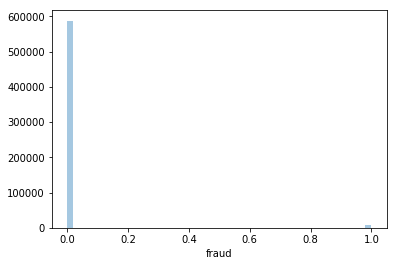

In [182]:
sns.distplot(df['fraud'], kde=False)


In [183]:
df.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [184]:
X = [['step', 'age','gender','zipcodeOri',
       'zipMerchant', 'amount']]

In [185]:
f_numeric =['step', 'age','gender','zipcodeOri',
       'zipMerchant', 'amount']

In [186]:
df['gender'] = df['gender'].replace({"'F'":0},regex = True)

In [187]:
df['gender'] = df['gender'].replace({"'M'":1},regex = True)

In [188]:
df['zipcodeOri'] = df['zipcodeOri'].replace({"'":''},regex = True)

In [189]:
df['zipMerchant'] = df['zipMerchant'].replace({"'":''},regex = True)

In [190]:
df['age'] = df['age'].replace({"'":''},regex = True)

In [191]:
df['step'] = df['step'].replace({'U',0},regex = True)

In [192]:
df['zipcodeOri'] = df['zipcodeOri'].replace({'U':0},regex = True)

In [193]:
df['zipMerchant'] = df['zipMerchant'].replace({'U':0},regex = True)

In [194]:
df['age'] = df['age'].replace({'U':0},regex = True)

In [195]:
df['gender'] = df['gender'].replace({'U':0},regex = True)

In [196]:
df['gender'] = df['gender'].replace({"'E'":1},regex = True)

In [197]:
X = df.drop(df.columns[[1,5, 7, 9]], axis=1)

In [198]:
X.shape

(594643, 6)

In [199]:
X.head(10)

,step,age,gender,zipcodeOri,zipMerchant,amount
0,0,4,1,28007,28007,4.55
1,0,2,1,28007,28007,39.68
2,0,4,0,28007,28007,26.89
3,0,3,1,28007,28007,17.25
4,0,5,1,28007,28007,35.72
5,0,3,0,28007,28007,25.81
6,0,1,0,28007,28007,9.10
7,0,4,0,28007,28007,21.17
8,0,3,1,28007,28007,32.40
9,0,5,0,28007,28007,35.40


In [200]:
Y= df[df.columns[9:]]

In [201]:
Y.head(10)

,fraud
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [202]:
X.shape

(594643, 6)

In [203]:
Y.shape

(594643, 1)

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dtr = tree.DecisionTreeRegressor(max_depth=6)

In [205]:
clf = tree.DecisionTreeClassifier(max_depth=6)

In [206]:
clf = dtr.fit(X_train, y_train)

In [207]:
y_train_predict = clf.predict(X_train)

In [208]:
y_test_predict = clf.predict(X_test)

In [209]:
from sklearn.metrics import r2_score

In [210]:
r2_score(y_train, y_train_predict)

0.4752042929729512

In [211]:
r2_score(y_test, y_test_predict)

0.4629019944112497

In [212]:
dot_data = tree.export_graphviz(clf, out_file=None) 

In [213]:
graph = graphviz.Source(dot_data)  


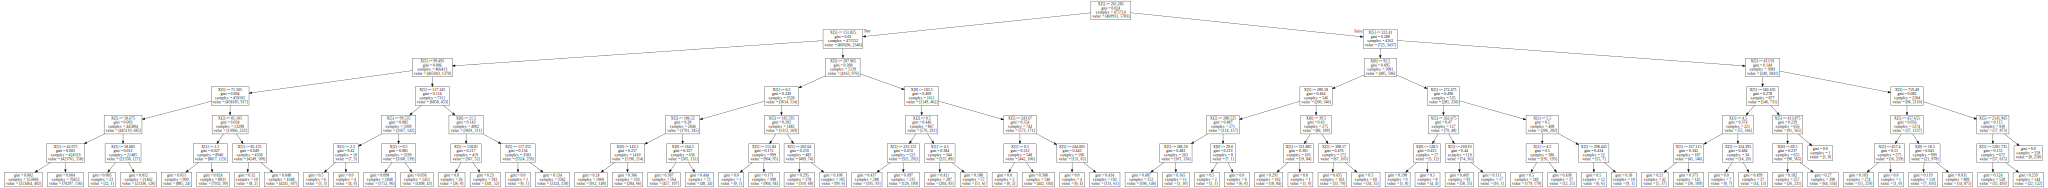

In [214]:
graph

In [215]:
def fit_and_score(max_depth, min_samples_leaf):
    dtr = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    dtr.fit(X_train, y_train)
    y_train_pred = dtr.predict(X_train)
    y_test_pred = dtr.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    return {'rmse_train': rmse_train, 'rmse_test': rmse_test} 

In [216]:
scores = {max_depth: fit_and_score(max_depth, 5) for max_depth in range(2, 10)}

In [217]:
scores = pd.DataFrame.from_dict(scores).T.stack().to_frame().reset_index()
scores.columns = ['max_depth', 'measue', 'value']

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


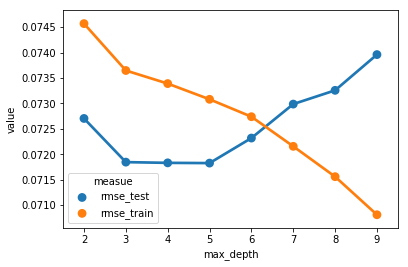

In [218]:
sns.pointplot(data=scores, x='max_depth', y='value', hue='measue')
